# Generating Target Data from Input Data for the stress/strain relationships in GKMs and GMMs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

I will not derive the maths here accept where necessary. The idea is to outline a code based guide to generating stress/strain data, using generalised viscoelastic models and Laplace transformation. The scope extends only so far as to generate the data, not to provide a way of analysing it to recover meaningful insight into the elastic moduli and viscosity values used to create it.

In the first case I will create data for a very simple case, mimicing mostly the methods outline by Roylance (include a reference here). However, in general, and later on demonstrated, the data can be generated by:

- Changing the input (stress or strain)

- Changing the functional form of the input

- Changing whether a generalised Kelvin model (GKM) or generalised Maxwell model (GMM) is used

- Increasing the number of dashpots and springs present in the model

- Changing the values of the elastic moduli and viscosities defining the springs and dashpots

- Using an expression that does not make the assumption that the input quantity is zero at $t=0$ (see below assumptions).

The general flow of creating this data will be as follows:

1. Write the general relationship of between the Laplace transform of stress and the Laplace transform of strain, taking into account the number of units in model.

2. Define a functional form of either stress or strain and perform a Laplace transformation of this in order to insert into the formula from 1.

3. Solve to recover the Laplace transform of the other variable to the one one defined in 2.

4. Inverse Laplace transform the result.

> At time of writing, my understanding is this method has some assumption already in step 1 allowing us to cast the problem simply in Laplace space. The assumptions are that:
- The Laplace transform is only defined when Laplace variable $s > 0$ (general property for Laplace transformation).
- The conversion assumes our function (and derivatives) do not diverge faster than $e^{st}$ (general again).
- The input function is 0 at $t = 0$ (Part of **our** method).

## Simple first case (GMM)

The standard building block of a maxwell model is the maxwell unit, which is a spring and dashpot in series. The first scenario we will generate data for is one of these maxwell units in parallel with another spring.

The input will be **strain** and the functional form will simply be a **step increase** in strain at $t=0$.

The general statement relating stress and strain in a maxwell unit is:

$$
\frac{d\epsilon}{dt} = \frac{1}{E}\frac{d\sigma}{dt} + \frac{1}{\eta}\sigma
\tag{1}
$$

where $\epsilon$ is strain, $t$ is time, $E$ is the elastic modulus of the spring, $\sigma$ is the stress, and $\eta$ is the viscosity of the dashpot.

Before transferring to Laplace space, it is useful to see that this equation can be rewritten as:

$$
(\frac{d}{dt})\epsilon = (\frac{1}{E}\frac{d}{dt} + \frac{1}{\eta})\sigma
$$

And thus rearranged to:
   
$$
\sigma = \frac{\frac{d}{dt}}{\frac{1}{E}\frac{d}{dt} + \frac{1}{\eta}}\epsilon
\tag{2}
$$

Now let us examine a Laplace transformation:

Allowing for the **general** assumptions from the introduction, the laplace transform of a derivative is:

$$
L[\frac{df(t)}{dt}] = s L[f(t)] - f(0)
\tag{2.5}
$$

where $L$ denotes a Laplace transform, and $s$ is the conjugate Laplace variable. Addtionally I will use the notation that $L[f] \equiv \bar{f}$.

If we use the additional assumption from the introduction, and understand the linearity of the Laplace transform, the general maxwell unit described in equation 1 can be rewritten as:

$$
s\bar{\epsilon} = \frac{1}{E}s\bar{\sigma} + \frac{1}{\eta}\bar{\sigma}
\tag{2.6}
$$

which can be rearranged in analogy to equation 2 to be:

$$
\bar{\sigma} = \frac{1}{\frac{1}{E} + \frac{1}{s\eta}}\bar{\epsilon}
\tag{3}
$$

It is generally true that the total stress in a **GMM** is the sum of the stress present in each parallel arm, mathematically stated as:

$$
\sigma = \sum_{i = 0} \sigma_{i}
$$

Because the Laplace transformation is linear, it is also then true that:

$$
\bar{\sigma} = \sum_{i = 0} \bar{\sigma_{i}}
\tag{4}
$$

$\sigma_{0}$ is always just a spring and so it not well described by simply setting $\eta = 0$ in equation 3. Instead, however, it is easy enough to remember that $\sigma_{0} = E_0\epsilon$ and so  $\bar{\sigma_{0}} = E_0\bar{\epsilon}$.

Using this, as well as equations 3 and 4, we can write the general equation for stress in a GMM:

$$
\bar{\sigma} = (E_0 + \sum_{i = 1} \frac{1}{\frac{1}{E_i} + \frac{1}{s\eta_i}})\bar{\epsilon}
\tag{5}
$$

To recover the expression for stress, we need to take the inverse Laplace transformation of the RHS of equation 5. Distributing the Laplace transform of strain a little, and performing describing inverse Laplace transformation, we can rewrite equation 5 as:

$$
\sigma = E_0L^{-1}[\bar{\epsilon}] + L^{-1}[(\sum_{i = 1} \frac{1}{\frac{1}{E_i} + \frac{1}{s\eta_i}})\bar{\epsilon}]
$$

This first term can be easily simplified as it is simply a reversal of the process, and the second term presents the real problem to solve:

$$
\sigma = E_0\epsilon + L^{-1}[(\sum_{i = 1} \frac{1}{\frac{1}{E_i} + \frac{1}{s\eta_i}})L[\epsilon]]
\tag{6}
$$

If we **choose the strain to be a step strain**, then the Laplace transform of this is just the magnitude of the step change ($\epsilon(t=0)$) divided by $s$. In other words, if $\epsilon(t) = \epsilon(0)$ then $\bar{\epsilon}(t) = \frac{\epsilon(0)}{s}$.

Additionally, if we **choose the model of the simple maxwell unit in parallel with a spring** then $i$ is only equal to $1$ and our sum disappears.

Combining these two choices, in this scenario, equation 6 becomes:

$$
\sigma = E_0\epsilon(0) + L^{-1}[\frac{1}{\frac{1}{E_1} + \frac{1}{s\eta_1}}\frac{\epsilon(0)}{s}]
$$

Simplification of this expression is totally not required. In more complicated models, and in particular with more complicated input strains or stresses, simplification will be tricky. It is not necessary for input into a module that can solve Laplace transformations to simplify anyway. However, for my own satisfaction, the above equation can be simplified to:

$$
\sigma = E_0\epsilon(0) + L^{-1}[\frac{\epsilon(0)}{\frac{s}{E_1} + \frac{1}{\eta_1}}]
$$

The SymPy extension to Python can be used to solve Laplace transformations and inverse Laplace transformations, as well as symbolically store and build up the expressions necessary to generate to solve the equations of interest to this endevour. For this first instance, in a very simple scenario, $s$ must be kept as a symbol, but the elastic moduli and viscosities are fed to the inverse transformation as numbers. Finally, we code:

In [ ]:
import sympy as sp

We define our variable $t$ and conjugate Laplace variable $s$ usinf the defining class in SymPy. In this simple scenario, where we did the forward Laplace Tranformation manually, we specify explicitely, that $s>0$ as per the second assumption from the introduction. In more complicated scenarios, we will use SymPy to compute the forward Laplace transformation and the conditions on the validity of $s$ will be implicit.

In [ ]:
t = sp.symbols('t')
s = sp.symbols('s', positive=True)

We specify our model parameters, here taken as generic small integers, with values not chosen for any particular reason. We also specify $\epsilon(0)$ as the value of the input strain.

In [ ]:
E_0 = 4
E_1 = 1
Eta_1 = 2

Eps_0 = 3

The first term is explicit, and doesn't need Laplace transformation, so we specify that as a number. We then evaluate the second term in two stages, first defining a symbolic expression, and then performing the inverse Laplace transformation. The expression is symbolic because the variable `s` is a SymPy symbol and is contained in the expression.

The arguements for `sp.inverse_laplace_transform` are: the symbolic expression, the variable denoting the Laplace symbol, the variable denoting the conjugate symbol.

The stress is then stored as a symbolic expression itself, as the function `sp.inverse_laplace_transform` also returns a symbolic expression.

In [ ]:
First_Term = E_0*Eps_0

expression = Eps_0/(s/E_1 + 1/Eta_1)
Second_Term = sp.inverse_laplace_transform(expression, s, t)

Stress = First_Term + Second_Term

We can see that `Stress` is symbolic by printing it. The symbolic expressions of SymPy actually are formatted more nicely is you simply state the expression. Note that `t` is now present in the expression, not `s`.

In [ ]:
Stress

The `subs` method can be used to evaluate the stress at any time, $t$.

In [ ]:
print(Stress.subs(t, 1))

SymPy tip: to ensure the thing you output here is a float, not a symbolic expression (ie, `0.33333`, rather than `1/3`, use the `evalf` method with the key arguements as substitutions.

In [ ]:
print(Stress.evalf(subs={t: 1}))

To plot Stress and Strain vs time, use the matplotlib module, which requires NumPy arrays as input.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

To prepare the data for the graph, Stress and Strain need to be evaluated at a series of time points. In this example, the strain is easy to state as it is a constant value for each time point. In future examples, the input function will be written as a symbolic expression in SymPy and evaulated much in the same way as Stress here is.

Stress is evaulated at a series of points, not just one as done above. The correct way to do this is using `sp.lambdify` which creates a function from a symbolic expression. To do this, SymPy expressions are converted into, by default, NumPy evaluating equivalents. The resulting function can take a NumPy array as input and return an array of outputs at a series of time points. HOWEVER, The conversion of Heaviside is not working (below) and so I have added an exception that manually builds up the array of Stress values using the point evaluation from above in loop. this is only triggered if `lambdify` encounteres an error.

ERROR: The conversion of Stress to Stress_Eval fails when evaluated because the conversion of the Heaviside function is not managed. This is a known issue https://github.com/sympy/sympy/issues/13176

ERROR: I think this ties to the above error and is essentially because the Heaviside function is poorly defined at $H(0)$. For reasons that are best known to the developers of SymPy, feeding in $0$ means the expression is returned without evaluation, as a string I believe. As a result, I have changed time to start at 0.5 instead

In [ ]:
time = np.linspace(0.5, 50, 100)
Strain = np.full(100, Eps_0)
try:
    Stress_Eval_Func = sp.lambdify(t, Stress)
    Stress_Eval = Stress_Eval_Func(time)
except:
    Stress_Eval = np.array([])
    for Time_Point in time:
        Stress_Eval = np.append(Stress_Eval, Stress.evalf(subs={t: Time_Point}))

We then plot a figure showing Stress and Strain vs time using standard `matplotlib.pyplot` code.

In [ ]:
fig, ax1 = plt.subplots()  # Create figure. Specifying no args accomplishes the same as in the next line, but setting figures up like this is good practise.
#fig = plt.figure() # Accomplishes the same as above but in simpler form


ax1.set_xlabel('Time (s)')

#Set up Strain on first axis
colour = 'tab:blue'
ax1.set_ylabel('Strain', color=colour)
ax1.plot(time, Strain, color=colour) # This is the key step that actually puts the data on the axes. The rest is asthetic.
ax1.tick_params(axis='y', labelcolor=colour)

#Create Second axis. twinx means that the new axes share the same x axis. twiny also exists.
ax2 = ax1.twinx()

#Set up Stress on second axis
colour = 'tab:red'
ax2.set_ylabel('Stress (N m^-2)', color=colour)  # we already handled the x-label with ax1
ax2.plot(time, Stress_Eval, color=colour)
ax2.tick_params(axis='y', labelcolor=colour)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title("Simple Stress response to Step Strain")

#plt.legend() # To use the legend add the kwarg label='data_lable' into the `plot` methods. Only displays legend for most recent axis.

plt.show()

## More complicated GMM

We will now consider a more complicated GMM that consists of 3, ratherthan one, Maxwell series units, all in parallel, and in parallel with a spring.

Also, while we will still use a step change in strain as the input, we will use SymPy to define it symbolically and better define the process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
t = sp.symbols('t')
s = sp.symbols('s')

Now, we newly define our elastic moduli and viscosities in lists, to allow for efficient build up of the sum in equation 6 in a loop.

In [3]:
E = [2, 5, 100, 45]
Eta = [38, 2, 10]

Define our Strain input, this time as a symbolic expression.

In [4]:
Strain_Step_Size = 10
Strain = Strain_Step_Size*sp.Heaviside(t)

In [10]:
Strain

10*Heaviside(t)

Perform the forward laplace transformation of this. This is the expression needed as a component of the expression in equation 6 needing inverse Laplace transformation.

The outputs are the new function, the boundary on the validity of the expression in terms of what s must be greater than (should be = 0), other conditions (I think this should be blank).

In [5]:
L_Strain, Min_s, Aux_Cond = sp.laplace_transform(Strain, t, s)

In [8]:
L_Strain

10/s

In [9]:
print(Min_s)

0


We now create the sum in equation 6. The function `sp.S` is a simple function that enforces the use of SumPy symbolic variables. It is used twice below, once to create a blank expression before the loop, and a second time to ensure that the fraction of $1/E_{i}$ is not made into a truncated float.

`Branch_Stress_Laplace_Sum` uses the expression in the sum from equation 6.

In [11]:
Total_Maxwell_Stress_Laplace_Sum = sp.S(0)
for Maxwell_Branch_Index in range(1, len(E)):
    Branch_Stress_Laplace_Sum = 1/(sp.S(1)/E[Maxwell_Branch_Index] + 1/(s*Eta[Maxwell_Branch_Index-1]))
    Total_Maxwell_Stress_Laplace_Sum += Branch_Stress_Laplace_Sum

In [12]:
Total_Maxwell_Stress_Laplace_Sum

1/(1/5 + 1/(38*s)) + 1/(1/45 + 1/(10*s)) + 1/(1/100 + 1/(2*s))

Next, we form the full expression that needs to be inverse Laplace transformed. This part is not easy to do in particular if the expression for strain is more complicated that what we are using right now.

In [13]:
To_Inverse = Total_Maxwell_Stress_Laplace_Sum*L_Strain

In [14]:
To_Inverse

10*(1/(1/5 + 1/(38*s)) + 1/(1/45 + 1/(10*s)) + 1/(1/100 + 1/(2*s)))/s

We compute the stress by adding the first term which did not need Laplace transformation and computing the inverse Laplace transformation for the 'second term' of equation 6.

In [15]:
Stress = E[0]*Strain + sp.inverse_laplace_transform(To_Inverse, s, t)

In [16]:
Stress

25*2**(5/19)*(9*exp(1905*t/38) + 20*exp(88*t/19) + exp(109*t/2))*exp(-1038*t/19)*sin(5*pi/19)*Heaviside(t)*gamma(5/38)*gamma(12/19)*gamma(14/19)/pi**(3/2) + 20*Heaviside(t)

Next we need to evaluate both the Strain and the Stress at various time points. We will do this using the `lambdify` function and the `try`-`except` control as before, but this time it will need to be executed twice, once for the strain, and once for the stress.

Seeing as this is repeat code, this time I will wrap it in a function and execute it twice.

In [20]:
def Eval_Array_From_Expression(Input_Value_Array, Symbol_Variable, Symbolic_Expression):
    try:
        Eval_Func = sp.lambdify(Symbol_Variable, Symbolic_Expression)
        Result_Array = Eval_Func(Input_Value_Array)
    except:
        Result_Array = np.array([])
        for Input_Value in Input_Value_Array:
            Result_Array = np.append(Result_Array, Symbolic_Expression.evalf(subs={Symbol_Variable: Input_Value}))
    
    return Result_Array

In [22]:
time = np.linspace(0.5, 50, 100)

Strain_Eval = Eval_Array_From_Expression(time, t, Strain)
Stress_Eval = Eval_Array_From_Expression(time, t, Stress)

here!
[10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000000000 10.0000000000000 10.0000000000000
 10.0000000000000 10.0000000

<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: overflow encountered in multiply
<string>:2: RuntimeWarning: invalid value encountered in multiply


^^ Above produces a series of `RuntimeWarning`s. I am not sure of the reason for this as, in reality, both results are returned from the function and can be plotted below, seemingly with no issue. The `RuntimeWarning`s may be encountered when evaluating some particular values of the function, it is not clear.

Next, we plot the results. Once again, the code here is reused from before, so I will wrap it in a function for future brevity.

In [29]:
def Plot_Strain_Stress(title, time, Strain_Eval, Stress_Eval):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time (s)')

    #Set up Strain on first axis
    colour = 'tab:blue'
    ax1.set_ylabel('Strain', color=colour)
    ax1.plot(time, Strain_Eval, color=colour) # This is the key step that actually puts the data on the axes. The rest is asthetic.
    ax1.tick_params(axis='y', labelcolor=colour)

    #Create Second axis. twinx means that the new axes share the same x axis. twiny also exists.
    ax2 = ax1.twinx()

    #Set up Stress on second axis
    colour = 'tab:red'
    ax2.set_ylabel('Stress (N m^-2)', color=colour)  # we already handled the x-label with ax1
    ax2.plot(time, Stress_Eval, color=colour)
    ax2.tick_params(axis='y', labelcolor=colour)


    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.title(title)

    plt.show()

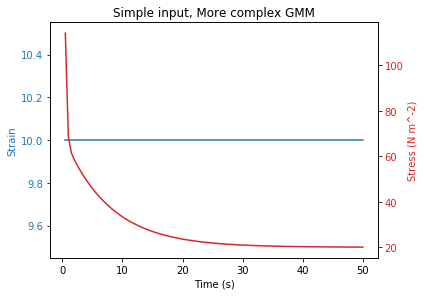

In [30]:
Plot_Strain_Stress('Simple input, More complex GMM', time, Strain_Eval, Stress_Eval)

## Reversing the role of Strain and Stress

Equation 5 can be easily rearranged to produce an expression for strain if stress is provided. It becomes

$$
\bar{\epsilon} = \frac{1}{E_0 + \sum_{i = 1} \frac{1}{\frac{1}{E_i} + \frac{1}{s\eta_i}}}\bar{\sigma}
\tag{6.5}
$$

The resulting expression is, of course, very similar to equation 5, but less simple. In addition, this equation must be written directly as the problem to solve, and the simplification where the term attached to $E_0$ could be expanded out is not possible. Hence, in this case, the equation to solve is:

$$
\epsilon = L^{-1}[\frac{1}{E_0 + \sum_{i = 1} \frac{1}{\frac{1}{E_i} + \frac{1}{s\eta_i}}}L[\sigma]]
\tag{7}
$$

This is solved in much the same way as before

> I am importing modules at the start of each subsection so that each subsection can be run independantly. In this subsection, I have included a custom module containing any functions defined over this notebook, so that convenience functions from previous subsections can be called without needing to find and run the appropriate cells if the kernal is restarted.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import VE_DataGen_Functions as vedg

In [2]:
t = sp.symbols('t')
s = sp.symbols('s')

For the sake of variety and speed of computation, I will use a model with two Maxwell arms this time:

In [3]:
E = [16, 45, 113]
Eta = [46, 19]

In [6]:
Stress_Step_Size = 20
Stress = Stress_Step_Size*sp.Heaviside(t)
Stress

20*Heaviside(t)

In [7]:
L_Stress, Min_s, Aux_Cond = sp.laplace_transform(Stress, t, s)
L_Stress

20/s

The next part builds up the sum as before. While before, this sum was multiplied directly into the Laplace transformation just computed, now it must have a constant added, and then be inversed first. However, we will first build up the sum using the same code, this time enclosing it in a function.

The only change in the code is the removal of the `-1` from the viscosity index. The idea is that the two input lists are provided with $E_0$ already clipped from the list, so both lists should be the same length. The loop range is changed accordingly also.

In [8]:
def Maxwell_Sum(Elastic_Moduli, Viscosities, L_sym):
    Total_Maxwell_Stress_Laplace_Sum = sp.S(0)
    for Maxwell_Branch_Index in range(len(Elastic_Moduli)):
        Branch_Stress_Laplace_Sum = 1/(sp.S(1)/Elastic_Moduli[Maxwell_Branch_Index] + 1/(L_sym*Viscosities[Maxwell_Branch_Index]))
        Total_Maxwell_Stress_Laplace_Sum += Branch_Stress_Laplace_Sum
    
    return Total_Maxwell_Stress_Laplace_Sum

With `D_frac` meaning the denominator of the fraction on the RHS of equation 7.

In [9]:
D_Frac = E[0] + Maxwell_Sum(E[1:], Eta, s)
D_Frac

16 + 1/(1/45 + 1/(46*s)) + 1/(1/113 + 1/(19*s))

In [10]:
To_Inverse = (1/D_Frac)*L_Stress
To_Inverse

20/(s*(16 + 1/(1/45 + 1/(46*s)) + 1/(1/113 + 1/(19*s))))

This next step is too computationally costly to manage. At least for the 2 Maxwell branch model here used, even after 2 hours of computation time, the iverse Laplace transformation had not completed. No error is found, suggesting it is just too slow to be useful, but not incorrect. I have written below it the intended graphing code, but I have not been able to view the results.

In [ ]:
Strain = sp.inverse_laplace_transform(To_Inverse, s, t)
Strain

In [ ]:
time = np.linspace(0.5, 50, 100)

Stress_Eval = vedg.Eval_Array_From_Expression(time, t, Stress)
Strain_Eval = vedg.Eval_Array_From_Expression(time, t, Strain)

In [ ]:
vedg.Plot_Strain_Stress('Simple stress input', time, Strain_Eval, Stress_Eval)

## Input Strain in a Simple GKM

The basic Kelvin unit is a spring and a dashpot in **parallel** with each other. The general statement relating stress and strain in a Kelvin unit is:

$$
\sigma = E\epsilon + \eta\frac{d\epsilon}{dt}
$$

In analogy to the flow used when deriving the maths for the GMM, this expression can be rearranged to

$$
\sigma = (E + \eta\frac{d}{dt})\epsilon
$$

After application of Laplace transformation, and keeping all assumptions from the introduction, this becomes:

$$
\bar{\sigma} = (E + s\eta)\bar{\epsilon}
\tag{7.5}
$$

or

$$
\bar{\epsilon} = \frac{1}{E + s\eta}\bar{\sigma}
$$

If we consider multiple of these Kelvin units in **series** with each other, we note that, for elements in series, the stress is the same for all elements, and:

$$
\epsilon = \sum_{i = 0} \epsilon_{i}
$$

and thus

$$
\bar{\epsilon} = \sum_{i = 0} \bar{\epsilon_{i}}
\tag{7.6}
$$

Therefore, the expression relating total stress and total strain in a GKM can be written:

$$
\bar{\epsilon} = (\sum_{i = 0} \frac{1}{E_i + s\eta_i})\bar{\sigma}
$$

A GKM also has a spring in series with all the Kelvin units. In contrast to the GMM, this **is** well described simply by setting $\eta_0 = 0$, but for parity between the two methods, I will extract the $i=0$ term from the sum to yeild an equation analogous to equation 5:

$$
\bar{\epsilon} = (\frac{1}{E_0} + \sum_{i = 1} \frac{1}{E_i + s\eta_i})\bar{\sigma}
\tag{8}
$$

In contrast to the most natural way to write this expression in a GMM, we have arrved at a natural expression for strain, for a given stress. Also, comparing the two, invoking an inverse Laplace transformation at this stage allows for the slight simplification from expanding out the $i = 0$ term when calculating the **strain**. In anaology to equations 6 and 7, the equation can be first written as:

$$
\epsilon = \frac{1}{E_0}L^{-1}[\bar{\sigma}] + L^{-1}[(\sum_{i = 1} \frac{1}{E_i + s\eta_i})\bar{\sigma}]
$$

and then

$$
\epsilon = \frac{1}{E_0}\sigma + L^{-1}[(\sum_{i = 1} \frac{1}{E_i + s\eta_i})L[\sigma]]
\tag{9}
$$

producing the problem to solve.

Now that we have arrived at a different expression to solve, most of teh code from before can be reused.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import VE_DataGen_Functions as vedg

In [2]:
t = sp.symbols('t')
s = sp.symbols('s')

E = [3, 7]
Eta = [5]

In [3]:
Stress_Step_Size = 15
Stress = Stress_Step_Size*sp.Heaviside(t)
Stress

15*Heaviside(t)

In [4]:
L_Stress, Min_s, Aux_Cond = sp.laplace_transform(Stress, t, s)
L_Stress

15/s

In [5]:
def Kelvin_Sum(Elastic_Moduli, Viscosities, L_Sym):
    Total_Laplace_Sum = sp.S(0)
    for Element_Index in range(len(Elastic_Moduli)):
        Element_Laplace_Sum = 1/(Elastic_Moduli[Element_Index] + L_Sym*Viscosities[Element_Index])
        Total_Laplace_Sum += Element_Laplace_Sum
    
    return Total_Laplace_Sum

In [7]:
To_Inverse = Kelvin_Sum(E[1:], Eta, s)*L_Stress
To_Inverse

15/(s*(5*s + 7))

In [8]:
Strain = Stress/E[0] + sp.inverse_laplace_transform(To_Inverse, s, t)
Strain

-15*sqrt(2)*sqrt(sqrt(5) + 5)*(2*exp(7*t/5)*gamma(-2/5)/5 + gamma(3/5))*exp(-7*t/5)*Heaviside(t)*gamma(2/5)/(28*pi) + 5*Heaviside(t)

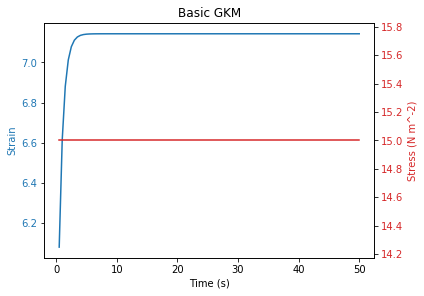

In [9]:
time = np.linspace(0.5, 50, 100)

Stress_Eval = vedg.Eval_Array_From_Expression(time, t, Stress)
Strain_Eval = vedg.Eval_Array_From_Expression(time, t, Strain)

vedg.Plot_Strain_Stress('Basic GKM', time, Strain_Eval, Stress_Eval)

## Using a GKM to calculate Stress

In analogy to equations 6.5 and 7, equation 8 can be rearranged to produce first:

$$
\bar{\sigma} = \frac{1}{\frac{1}{E_0} + \sum_{i = 1} \frac{1}{E_i + s\eta_i}}\bar{\epsilon}
$$

and then

$$
\sigma = L^{-1}[\frac{1}{\frac{1}{E_0} + \sum_{i = 1} \frac{1}{E_i + s\eta_i}}L[\epsilon]]
\tag{10}
$$

giving the problem to solve.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import VE_DataGen_Functions as vedg

In [2]:
t = sp.symbols('t')
s = sp.symbols('s')

E = [3, 7]
Eta = [5]

In [3]:
Strain_Step_Size = 15
Strain = Strain_Step_Size*sp.Heaviside(t)
Strain

15*Heaviside(t)

In [4]:
L_Strain, Min_s, Aux_Cond = sp.laplace_transform(Strain, t, s)
L_Strain

15/s

In [9]:
D_Frac = 1/E[0] + vedg.Kelvin_Sum(E[1:], Eta, s)
D_Frac

3 + 1/(5*s + 7)

In [11]:
To_Inverse = (1/D_Frac)*L_Strain
To_Inverse

15/(s*(3 + 1/(5*s + 7)))

In [12]:
Stress = sp.inverse_laplace_transform(To_Inverse, s, t)
Stress

5*(7*gamma(22/15)/(5*gamma(37/15)) - exp(-22*t/15)*gamma(-22/15)/(15*gamma(-7/15)))*Heaviside(t)

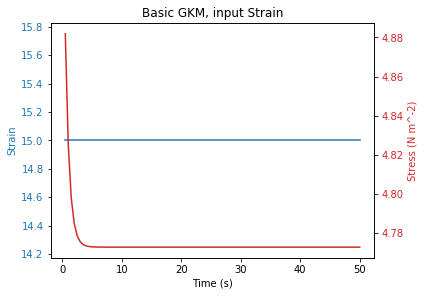

In [13]:
time = np.linspace(0.5, 50, 100)

Strain_Eval = vedg.Eval_Array_From_Expression(time, t, Strain)
Stress_Eval = vedg.Eval_Array_From_Expression(time, t, Stress)

vedg.Plot_Strain_Stress('Basic GKM, input Strain', time, Strain_Eval, Stress_Eval)

## More complicated input

Up till now, we have used only step stress or strains as input, We are very interested of course in the response when a more complicated input is used. I will choose an input function before deciding whether i am specifying stress or strain, and then use the above code to run the input as both options, through both Maxwell and Kelvin Models of various size.

To demonstrate in the first cases the different input functions I have in mind, I will only use a simple GMM with strain input, matching the first model explored.

### Input is proportional to $t$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import VE_DataGen_Functions as vedg

This code block is a block of **choices**. Below it, I have generalised the methods above described into more concise, multi-purpose functions that only need to be told our choicees of input and model, and will produce a function of the response.

Most of the strings defined have direct use in specifying the maths to be used. `Input_Description` is purely present in order to be incorporated into the title of the graph later.

The input function is simply linear with $t$.

In [16]:
Input_Type = 'Strain'
Model_Type = 'GMM'

'''
I have specified far more constants than I intend to use here
just to demonstrate that slicing can be used to easily change
the model size without any other change to the code.
'''
E = [1, 2, 3, 4, 5]
Eta = [6, 7, 8, 9]

t = sp.symbols('t')
Input_Function = 0.01*t
Input_Description = 'Linear'

As so much of the code is common, or follows a similar pattern regardless of model type or input type, I have written a general purpose function below.

> Note: The strings for making choices must match exactly expectations, ie `Strain` not `strain`.

In [3]:
def Stress_Strain_Master(Input_Type, Model_Type, E_Mods, Viscs, t, Input_Function):
    
    s = sp.symbols('s')
    
    L_Input, Min_s, Aux_Cond = sp.laplace_transform(Input_Function, t, s)
    
    Post_Inverse_Addition = 0
    
    if Input_Type == 'Strain' and Model_Type == 'GKM':
        To_Inverse = (1/(1/E_Mods[0] + vedg.Kelvin_Sum(E_Mods[1:], Viscs, s)))*L_Input
    elif Input_Type == 'Stress' and Model_Type == 'GKM':
        To_Inverse = vedg.Kelvin_Sum(E_Mods[1:], Viscs, s)*L_Input
        Post_Inverse_Addition = Input_Function/E_Mods[0]
    elif Input_Type == 'Stress' and Model_Type == 'GMM':
        To_Inverse = (1/(E[0] + vedg.Maxwell_Sum(E_Mods[1:], Viscs, s)))*L_Input
    elif Input_Type == 'Strain' and Model_Type == 'GMM':
        To_Inverse = vedg.Maxwell_Sum(E_Mods[1:], Viscs, s)*L_Input
        Post_Inverse_Addition = Input_Function*E_Mods[0]
    else:
        print('Improper description of input or model choice')
        return None
    
    Inversed_Expression = sp.inverse_laplace_transform(To_Inverse, s, t)
    
    Response_Expression = Inversed_Expression + Post_Inverse_Addition
    
    return Response_Expression

In [17]:
Response_Expression = Stress_Strain_Master(Input_Type, Model_Type, E[:2], Eta[:1], t, Input_Function)

I also wrap some previously defined functions in a higher level function for plotting the results.

In [13]:
def Eval_Graph_Stress_Strain(title, Time_Points, Strain_Expr, Stress_Expr, t):

    Strain_Eval = vedg.Eval_Array_From_Expression(Time_Points, t, Strain_Expr)
    Stress_Eval = vedg.Eval_Array_From_Expression(Time_Points, t, Stress_Expr)

    vedg.Plot_Strain_Stress(title, Time_Points, Strain_Eval, Stress_Eval)

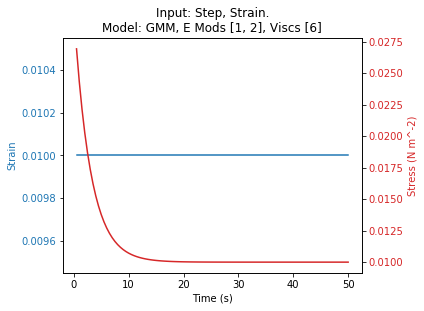

In [18]:
time = np.linspace(0.5, 50, 100)

title = ('Input: ' + Input_Description + ', ' + Input_Type + 
         '.\nModel: ' + Model_Type + ', E Mods ' + str(E[:2]) + ', Viscs ' + str(Eta[:1]))

#Careful, This function assumes the first expression is strain, and the second stress.
#Depending on the Input_Type, the Response_Expression might need to be the first or second arguement.
Eval_Graph_Stress_Strain(title, time, Input_Function, Response_Expression, t)

### Input is periodic

A periodic input can be specified by $\sin(t)$. This is chosen because $\sin(0) = 0$ and so does not raise a problem for our $f(0) = 0$ assumption from the introduction.

As I have written all previously defined functions into an accompanying .py file, Matplotlib does not need to be imported into this subsection anymore.

In [1]:
import numpy as np
import sympy as sp
import VE_DataGen_Functions as vedg

The only odd change here is that I have demanded that the symbol, `t` is only valid for positive values. This is fair as we can always consider that our manipulation has to have a beginning point, and this might as well be at $t=0$. Why the change? The expression being recovered was even more complicated than it becomes now, and NumPy was failing to extract only the real parts of the answer. This solved the issue. (Imaginary parts were miniscule at order of mag $10^{-30}$ or so.)

> Instead, setting a `negative=False` flag which may seem more correct does not have the same affect as the choice made here, and an error is still encountered.
Surprisingly, this choice does not stop us evaluating the expression at $t=0$ for graphing purposes.

In [2]:
Input_Type = 'Strain'
Model_Type = 'GMM'

E = [1, 47, 3, 6]
Eta = [6, 30, 100]

t = sp.symbols('t', positive=True, real=True)
Input_Function = sp.sin(t)
Input_Description = 'Periodic'
Input_Function

sin(t)

In [ ]:
Response_Expression = vedg.Stress_Strain_Master(Input_Type, Model_Type, E, Eta, t, Input_Function)
Response_Expression

As a result of some of the errors discussed above, the function `vedg.Eval_Graph_Strain_Stress` has been modified slightly to plot only the real part of the result of evaluating the strain and stress expressions.

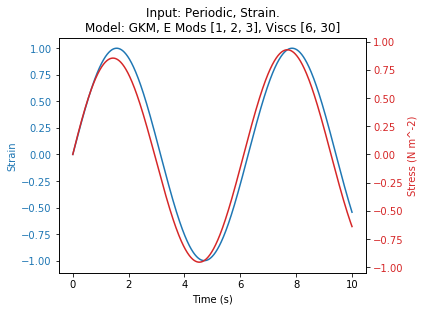

In [44]:
time = np.linspace(0, 10, 1000)

title = ('Input: ' + Input_Description + ', ' + Input_Type + 
         '.\nModel: ' + Model_Type + ', E Mods ' + str(E) + ', Viscs ' + str(Eta))

vedg.Eval_Graph_Strain_Stress(title, time, Input_Function, Response_Expression, t)

### Input is a damped oscillation

Damped oscillation modelled as:

$$
f(t) = e^{-0.1t}\sin{t}
$$

In [1]:
import numpy as np
import sympy as sp
import VE_DataGen_Functions as vedg

In [29]:
Input_Type = 'Stress'
Model_Type = 'GKM'

E = [1, 2]
Eta = [6]

t = sp.symbols('t', positive=True, real=True)
Input_Function = sp.exp(-0.1*t)*sp.sin(t)
Input_Description = 'Damped Periodic'
Input_Function

exp(-0.1*t)*sin(t)

ERROR: The code cannot handle using a GKM for strain input or a GMM for stress input.

In [30]:
Response_Expression = vedg.Stress_Strain_Master(Input_Type, Model_Type, E, Eta, t, Input_Function)
Response_Expression

0.158061116965227*exp(-0.333333333333333*t) + exp(-0.1*t)*sin(t) + 0.0368809272918862*exp(-0.1*t)*sin(1.0*t) - 6.59423141182578e-19*I*exp(-0.1*t)*sin(1.0*t) - 0.158061116965227*exp(-0.1*t)*cos(1.0*t)

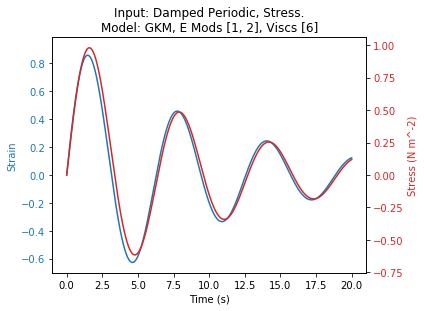

In [31]:
time = np.linspace(0, 20, 1000)

title = ('Input: ' + Input_Description + ', ' + Input_Type + 
         '.\nModel: ' + Model_Type + ', E Mods ' + str(E) + ', Viscs ' + str(Eta))

vedg.Eval_Graph_Strain_Stress(title, time, Input_Function, Response_Expression, t)

### Input has increasing frequency of oscillation

Modelled as:

$$
f(t) = \sin(0.01t^2)
$$

In [1]:
import numpy as np
import sympy as sp
import VE_DataGen_Functions as vedg

In [20]:
Input_Type = 'Strain'
Model_Type = 'GKM'

E = [1, 2]
Eta = [6]

t = sp.symbols('t', positive=True, real=True)
Input_Function = sp.sin(t**2)
Input_Description = 'Increasing Frequency Periodic'
Input_Function

sin(t**2)

ERROR: SymPy cannot handle this next bit. It fails at the inverse transform stage for reasons that are not clear.

Also, attempting to use the expression, $f(t) = \sin(t\ln{t})$ results in an error in the forward Laplace transform stage.

Also, trying to find Strain with a GKM or stress with a GMM does not produce an error, but does result in the inverse transform not following through and giving a useless result.

In [21]:
Response_Expression = vedg.Stress_Strain_Master(Input_Type, Model_Type, E, Eta, t, Input_Function)
Response_Expression

sqrt(2)*sqrt(pi)*InverseLaplaceTransform(sin(s**2/4)/(1 + 1/(6*s + 2)), s, t, _None)/4 + sqrt(2)*sqrt(pi)*InverseLaplaceTransform(cos(s**2/4)/(1 + 1/(6*s + 2)), s, t, _None)/4 - sqrt(2)*sqrt(pi)*InverseLaplaceTransform(sin(s**2/4)*fresnels(sqrt(2)*s/(2*sqrt(pi)))/(1 + 1/(6*s + 2)), s, t, _None)/2 - sqrt(2)*sqrt(pi)*InverseLaplaceTransform(cos(s**2/4)*fresnelc(sqrt(2)*s/(2*sqrt(pi)))/(1 + 1/(6*s + 2)), s, t, _None)/2

In [ ]:
time = np.linspace(0, 20, 1000)

title = ('Input: ' + Input_Description + ', ' + Input_Type + 
         '.\nModel: ' + Model_Type + ', E Mods ' + str(E) + ', Viscs ' + str(Eta))

vedg.Eval_Graph_Strain_Stress(title, time, Input_Function, Response_Expression, t)

### Sinc function

In [1]:
import numpy as np
import sympy as sp
import VE_DataGen_Functions as vedg

In [12]:
Input_Type = 'Strain'
Model_Type = 'GMM'

E = [1, 2]
Eta = [6]

t = sp.symbols('t', positive=True, real=True)
Input_Function = sp.sinc(t)
Input_Description = 'Sinc Periodic'
Input_Function

sinc(t)

ERROR: While the below does not generate an error, it seems to give up on following through on the inverse Laplace transformation and so cannot be evaluated and plotted.

In [13]:
Response_Expression = vedg.Stress_Strain_Master(Input_Type, Model_Type, E, Eta, t, Input_Function)
Response_Expression

InverseLaplaceTransform(atan(1/s)/(1 + 1/(1/2 + 1/(6*s))), s, t, _None)

In [ ]:
time = np.linspace(0, 20, 1000)

title = ('Input: ' + Input_Description + ', ' + Input_Type + 
         '.\nModel: ' + Model_Type + ', E Mods ' + str(E) + ', Viscs ' + str(Eta))

vedg.Eval_Graph_Strain_Stress(title, time, Input_Function, Response_Expression, t)

## Removing the $f(0) = 0$ assumption (WIP!!!!)

All 4 problems to solve so far derived (equations 6, 7, 9 and 10) carry the assumption from the introduction that the stress and strain are both 0 at $t=0$. If we remove this assumption, and start again from equation 1, we can use the full expression of equation 2.5, to make an alternative version of equation 2.6

$$
s\bar{\epsilon} - \epsilon(0) = \frac{1}{E}(s\bar{\sigma} - \sigma(0)) + \frac{1}{\eta}\bar{\sigma}
\tag{11}
$$

Remembering that this was the equation for a Maxwell unit, we make the analogous change the Kelvin unit.

$$
\bar{\sigma} = E\bar{\epsilon} + \eta(s\bar{\epsilon} - \epsilon(0))
\tag{12}
$$

We will start by rewriting equation 6 for this change and hence use equation 11 for now.

The analogy to equation 3 is

$$
\bar{\epsilon} = (\frac{1}{E} + \frac{1}{s\eta})\bar{\sigma} +\frac{1}{s}(\epsilon(0) - \frac{\sigma(0)}{E})
$$

ISSUE: This cannot be solved. Although the extra term is, in theory, just a constant divided by the Laplace variable, $s$, one of these constants will always be unknown, until we solve the problem.

Equation 12 presents an equation which does not contain $\sigma(0)$. In theory, this may mean that it is possible to use the GKM to more accurately model stress from strain inputs, improving equation 10 only. Thus, I will continue with this. Equation 12 can be written:

$$
\bar{\sigma} = (E + s\eta)\bar{\epsilon} - \eta\epsilon(0)
$$

or

$$
\bar{\epsilon} = \frac{\bar{\sigma} + \eta\epsilon(0)}{E + s\eta}
$$

Considering equation 7.6

$$
\bar{\epsilon} = \sum_{i = 0} \frac{\bar{\sigma} + \eta_i\epsilon_i(0)}{E_i + s\eta_i}
$$

$$
\bar{\epsilon} = \bar{\sigma}\sum_{i = 0} \frac{1}{E_i + s\eta_i} + \sum_{i = 0} \frac{\eta_i\epsilon_i(0)}{E_i + s\eta_i}
$$

$$
\bar{\sigma} = \frac{\bar{\epsilon} - \sum_{i = 0} \frac{\eta_i\epsilon_i(0)}{E_i + s\eta_i}}{\sum_{i = 0} \frac{1}{E_i + s\eta_i}} 
$$

As $\eta_0 = 0$, this also changes to:

$$
\bar{\sigma} = \frac{\bar{\epsilon} - \sum_{i = 1} \frac{\eta_i\epsilon_i(0)}{E_i + s\eta_i}}{\sum_{i = 0} \frac{1}{E_i + s\eta_i}} 
$$

I am going to leave this for now. The application seems limited and the problem difficult. In any case, most of my functions are indeed $=0$ at $t=0$ so this will not be very useful. The fraction can be split, but still, this will result in  large sums, all involving Laplace variable $s$ and all therefore being taxing for an inverse Laplace transformation, and computationally heavy.

## Final Comments

The following things are not working:

- $f(t)=sinc(t)$, $e^{-t}sin(t)$ and $sin(t^2)$ do not work entirely.

- There is still an assumption that $f(0) = 0$

- Beyond a lone spring and 2 units (Maxwell or Kelvin type), the computation time becomes very long, long enough that I stopped waiting.